In [2]:
#importing all the different libraries that we will need for this part. 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from feature_engine.transformation import ReciprocalTransformer
from feature_engine.transformation import LogTransformer
from feature_engine.pipeline import Pipeline

xdata = pd.read_csv(r"C:\Users\luker\OneDrive\Desktop\erdos_ds_f1\Merlin preview\gaps and circuit type (no DNF).csv")  #or we can use different files for each, but they should be in the right order

ydata = pd.read_csv(r"C:\Users\luker\OneDrive\Desktop\erdos_ds_f1\jaegeon\mean-absolute-position-difference-no-DNF.csv")

# 'First_ten_gap', 'Bgap_mean'
X  = xdata[ ["Bgap_mean", "First_ten_gap"]]



#getting rid of any nan variables
X = X.dropna() 

Y = ydata["absolute_position_diff"]  #this is our target, what we are trying to predict, and will use this to test our predictive model. 


# We need to make sure that the X and Y dataframes are aligned, so we will drop any rows in Y that do not have a corresponding row in X
Y = Y[X.index]  #this will ensure that Y is aligned with X, so that we can use them together in our model.

X_train,X_test , Y_train, Y_test = train_test_split(X,Y , test_size= 0.2, random_state= 117)



In [8]:
Y_train_log = np.log(Y_train)
Y_train_log

160    2.238047
337    0.747214
673    1.540445
198    1.197703
290    1.241713
         ...   
601    1.058607
339    1.504077
80     1.845827
112    1.717651
496    1.036092
Name: absolute_position_diff, Length: 562, dtype: float64

In [9]:
Y_test_log = np.log(Y_test)

In [27]:
pipe = Pipeline(steps=[
    ('log', LogTransformer()),
    ('poly', PolynomialFeatures(degree=3)),
    ('linear_regression', LinearRegression())
])

In [34]:
pipe.fit(X_train, Y_train_log)
Y_pred_log = pipe.predict(X_test)

# Calculate and print the metrics for the pipeline model
mse = mean_squared_error(Y_test_log, Y_pred_log)
r2 = r2_score(Y_test_log, Y_pred_log)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.12483778618383361
R-squared: 0.3989895508130554


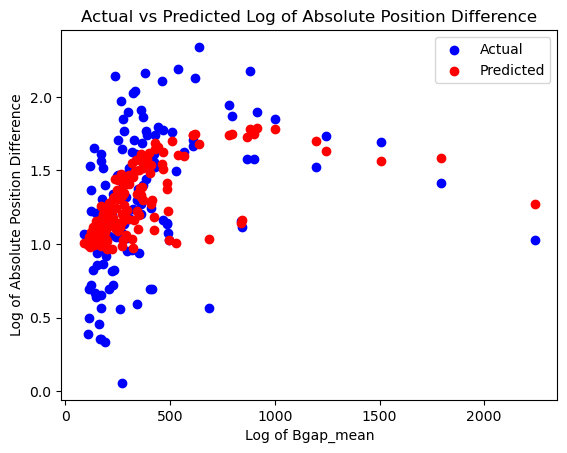

In [35]:
# Plotting the results
import matplotlib.pyplot as plt
plt.scatter(X_test['Bgap_mean'], Y_test_log, color='blue', label='Actual')
plt.scatter(X_test['Bgap_mean'], Y_pred_log, color='red', label='Predicted')
plt.xlabel('Log of Bgap_mean')
plt.ylabel('Log of Absolute Position Difference')
plt.title('Actual vs Predicted Log of Absolute Position Difference')
plt.legend()
plt.show()

In [36]:
pipe.fit(X_train, Y_train)
Y_pred = pipe.predict(X_test)

# Calculate and print the metrics for the pipeline model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.9417477478154548
R-squared: 0.4233265877931295


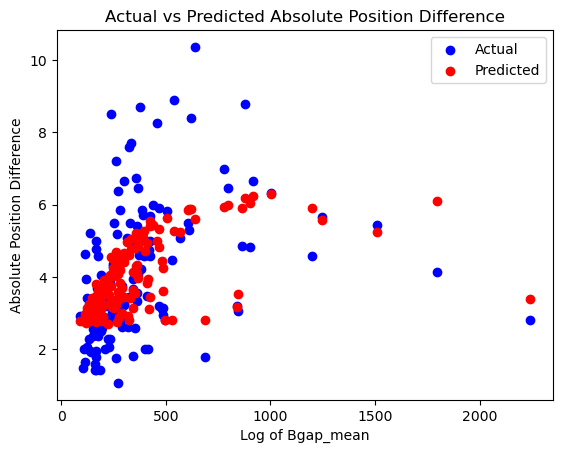

In [37]:
# Plotting the results
import matplotlib.pyplot as plt
plt.scatter(X_test['Bgap_mean'], Y_test, color='blue', label='Actual')
plt.scatter(X_test['Bgap_mean'], Y_pred, color='red', label='Predicted')
plt.xlabel('Log of Bgap_mean')
plt.ylabel('Absolute Position Difference')
plt.title('Actual vs Predicted Absolute Position Difference')
plt.legend()
plt.show()